## Introduction

## Business goals

## Analytics goals

## Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# 1. Load the dataset
df = pd.read_csv('SAR Rental.csv')
print(df.head())

   row#  user_id  vehicle_model_id  package_id  travel_type_id  from_area_id  \
0     1    17712                12         NaN               2        1021.0   
1     2    17037                12         NaN               2         455.0   
2     3      761                12         NaN               2         814.0   
3     4      868                12         NaN               2         297.0   
4     5    21716                28         NaN               2        1237.0   

   to_area_id  from_city_id  to_city_id       from_date        to_date  \
0      1323.0           NaN         NaN  1/1/2013 22:33            NaN   
1      1330.0           NaN         NaN  1/1/2013 12:43            NaN   
2       393.0           NaN         NaN   1/2/2013 0:28  1/3/2013 0:00   
3       212.0           NaN         NaN  1/1/2013 13:12            NaN   
4       330.0           NaN         NaN  1/1/2013 16:33            NaN   

   online_booking  mobile_site_booking booking_created   from_lat  from_lo

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           1752 non-null   float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         9985 non-null   float64
 6   to_area_id           7909 non-null   float64
 7   from_city_id         3706 non-null   float64
 8   to_city_id           339 non-null    float64
 9   from_date            10000 non-null  object 
 10  to_date              5822 non-null   object 
 11  online_booking       10000 non-null  int64  
 12  mobile_site_booking  10000 non-null  int64  
 13  booking_created      10000 non-null  object 
 14  from_lat             9985 non-null   float64
 15  from_long            9985 non-null   

In [4]:
#check for missing values
print("Data before processing: ")
print(df.isnull().sum())

#fill missing values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

#check for missing values
print("Data after processing: ")
print(df.isnull().sum())

Data before processing: 
row#                      0
user_id                   0
vehicle_model_id          0
package_id             8248
travel_type_id            0
from_area_id             15
to_area_id             2091
from_city_id           6294
to_city_id             9661
from_date                 0
to_date                4178
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 15
from_long                15
to_lat                 2091
to_long                2091
Car_Cancellation          0
dtype: int64
Data after processing: 
row#                   0
user_id                0
vehicle_model_id       0
package_id             0
travel_type_id         0
from_area_id           0
to_area_id             0
from_city_id           0
to_city_id             0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat

In [5]:
cat_cols = ['travel_type_id', 'package_id', 'online_booking', 'mobile_site_booking', 'Car_Cancellation']
print("\nUnique Values in Categorical Columns:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
travel_type_id: [2 3 1]
package_id: [1. 2. 3. 4. 6. 7. 5.]
online_booking: [0 1]
mobile_site_booking: [0 1]
Car_Cancellation: [0 1]


In [6]:


# Drop the problematic datetime columns
df=df.drop(columns=['from_date', 'to_date', 'booking_created'])

# Check if the issue is resolved
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           10000 non-null  float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         10000 non-null  float64
 6   to_area_id           10000 non-null  float64
 7   from_city_id         10000 non-null  float64
 8   to_city_id           10000 non-null  float64
 9   online_booking       10000 non-null  int64  
 10  mobile_site_booking  10000 non-null  int64  
 11  from_lat             10000 non-null  float64
 12  from_long            10000 non-null  float64
 13  to_lat               10000 non-null  float64
 14  to_long              10000 non-null  float64
 15  Car_Cancellation     10000 non-null  

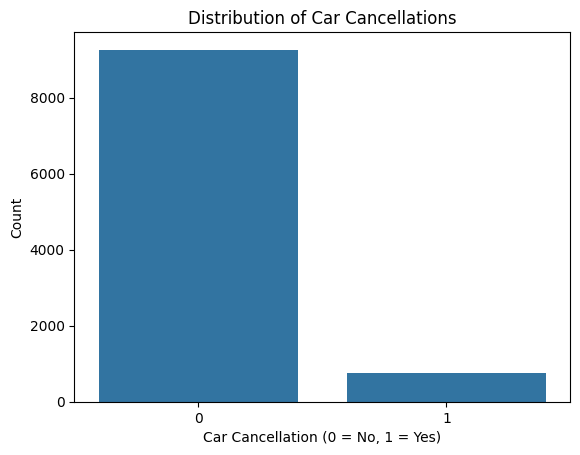

In [7]:
# Distribution of cancellations
sns.countplot(data=df, x='Car_Cancellation')
plt.title("Distribution of Car Cancellations")
plt.xlabel("Car Cancellation (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding categorical columns
le = LabelEncoder()

df['vehicle_model_id'] = le.fit_transform(df['vehicle_model_id'])
df['travel_type_id'] = le.fit_transform(df['travel_type_id'])
df['from_area_id'] = le.fit_transform(df['from_area_id'])
df['to_area_id'] = le.fit_transform(df['to_area_id'])

# Note: 'Car_Cancellation' is already binary, so no need for encoding.

In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your cleaned dataframe and preprocessed
X = df.drop(columns=['Car_Cancellation'])  # Features
y = df['Car_Cancellation']  # Target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to evaluate model
def accuracy(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

In [11]:
# Logistic Regression
log_reg = LogisticRegression(solver='liblinear', max_iter=2000)
accuracy(log_reg, "Logistic Regression")


Model: Logistic Regression
Accuracy: 0.9380


In [12]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
accuracy(rf_model, "Random Forest")


Model: Random Forest
Accuracy: 0.9375


In [13]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
accuracy(knn_model, "K-Nearest Neighbors")


Model: K-Nearest Neighbors
Accuracy: 0.9275


In [14]:
# Support Vector Machine (SVM)
svm_model = SVC()
accuracy(svm_model, "Support Vector Machine")


Model: Support Vector Machine
Accuracy: 0.9380


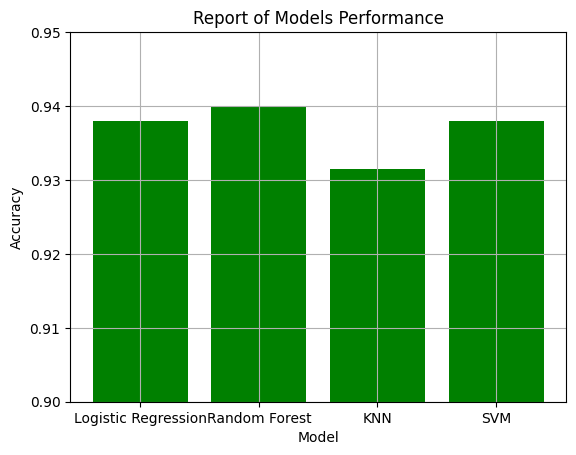

In [15]:
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
accuracies = [0.9380, 0.9400, 0.9315, 0.9380]

plt.bar(model_names, accuracies, color='green')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Report of Models Performance')
#adding min and max values on y axis
plt.ylim(0.90, 0.95)
plt.grid(True)
plt.show()


## Selected Model: Random Forest

In [16]:
# Function to evaluate model
def evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    
    # Confusion Matrix
    # cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    # plt.title(f'Confusion Matrix - {model_name}')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.show()


In [17]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate(rf_model, "Random Forest")


Model: Random Forest
Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1876
           1       0.48      0.11      0.18       124

    accuracy                           0.94      2000
   macro avg       0.71      0.55      0.58      2000
weighted avg       0.92      0.94      0.92      2000



## Conclusion

Random Forest gave the best results — around 94% accuracy. Also, detect some cancelled rides.
Logistic Regression and SVM had 93.8% accuracy which is super close to random forest but isnt the best to work with.
KNN was okay, but still not great at identifying the rare cancellations

## Supporting SAR Goals